In [87]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading dataset
df = pd.read_csv("Raw_dataset.csv")   # Change name if your file is different
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [88]:
#Five-number summary (min, Q1, median, Q3, max)
#This table shows the range, quartiles, and median of each numeric column.
#It helps identify possible outliers and understand the data distribution.
df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


This table shows the minimum, maximum, median, and quartile values for each numeric column.  
It helps us see how the data is spread and if there are very high or very low values.  
We noticed some large differences between the max and min values, so we decided to apply normalization to make them closer in scale.

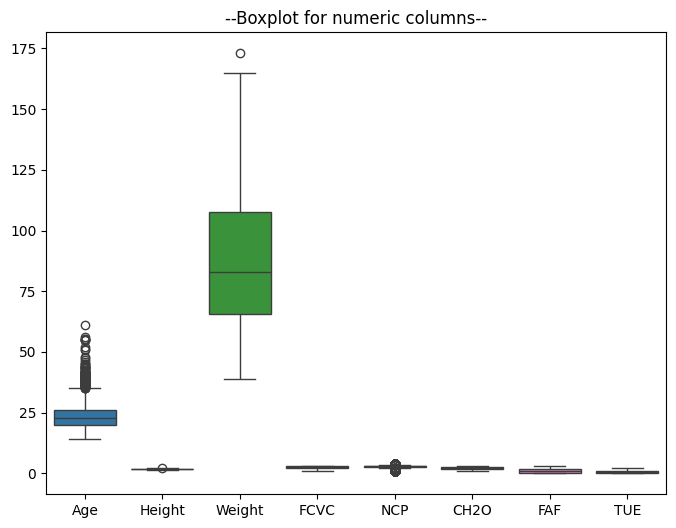

In [89]:
#Boxplot to check outliers
#Boxplots display the distribution and outliers of numeric data.
#Points outside the whiskers indicate potential outliers that may need cleaning.
plt.figure(figsize=(8,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("--Boxplot for numeric columns--")
plt.show()


The boxplot shows the distribution of the numeric columns and highlights outliers (points outside the boxes).  
We can see that some columns like Weight and Age have a few outliers.  
This helped us realize that we need a preprocessing step to handle these outliers and make the data cleaner.

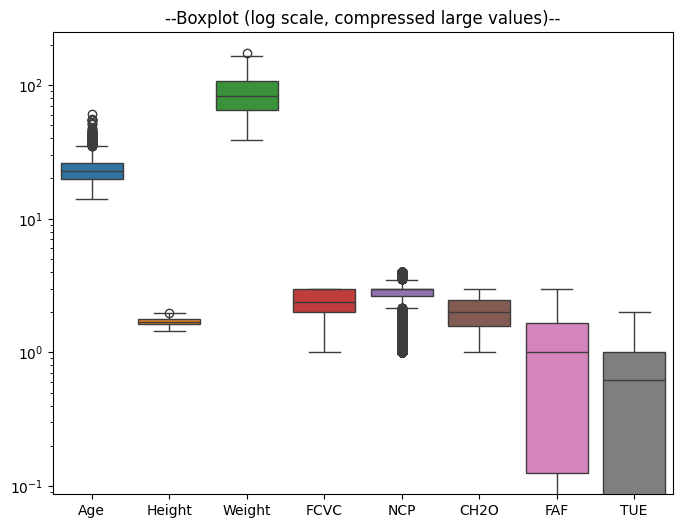

In [90]:
# Boxplot with log scale to make smaller-value columns more visible
# This version compresses large values (like Weight) so smaller attributes appear clearer.
plt.figure(figsize=(8,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.yscale('log')
plt.title("--Boxplot (log scale, compressed large values)--")
plt.show()


Here we used a log scale to make small-value columns easier to see.  
This view helped us notice that the data is not on the same scale — some values are too large compared to others.  
That’s why we decided to apply normalization later to fix this difference.


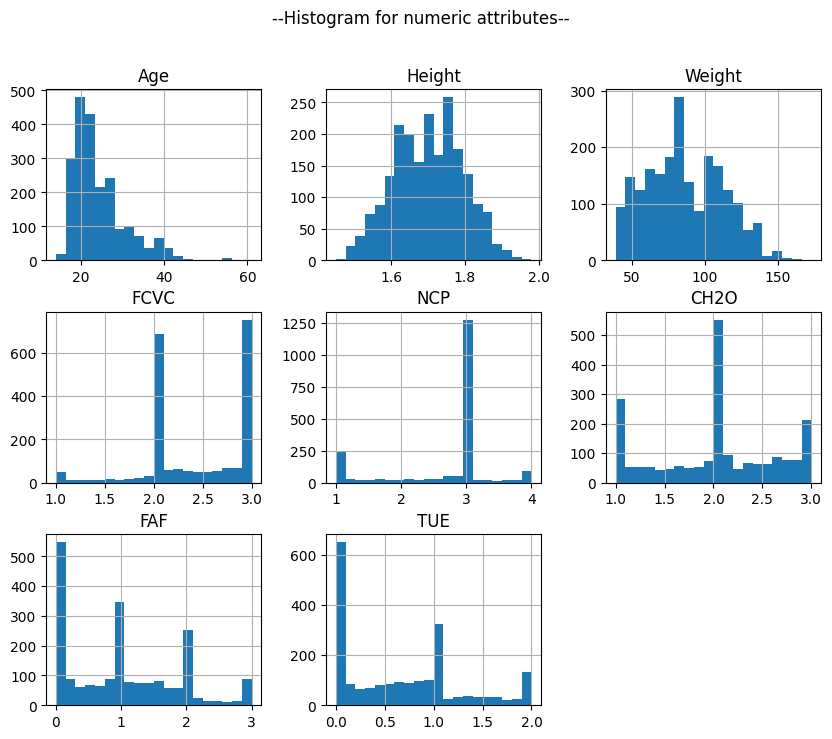

In [91]:
#Histogram for numeric data distribution
#Histograms show how data values are distributed.
#Skewed or uneven distributions suggest normalization or preprocessing is needed.
df.hist(figsize=(10,8), bins=20)
plt.suptitle("--Histogram for numeric attributes--")
plt.show()

The histograms show how each numeric column’s values are distributed.  
Some of them are not evenly spread and are a bit skewed.  
This told us that our data could benefit from normalization and possibly discretization to make the ranges more consistent.

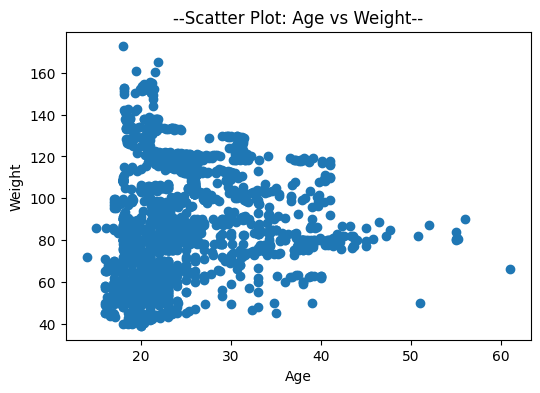

In [92]:
#Scatter plot between two columns (example: Age vs Weight)
#Scatter plots show the relationship between two numeric columns.
#Clusters, trends, or extreme points can indicate patterns or outliers.
plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['Weight'])
plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("--Scatter Plot: Age vs Weight--")
plt.show()


This scatter plot shows the relationship between Age and Weight.  
We can see that weight increases slightly with age, but there are some points far away from the others.  
These extreme points confirmed that we need to handle outliers in preprocessing.

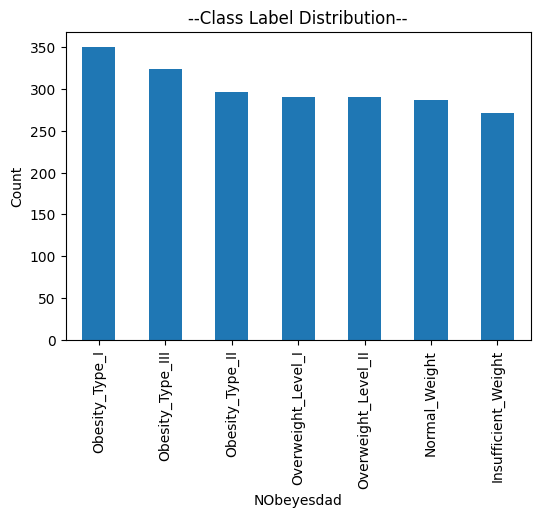

In [93]:
#Bar plot for class label distribution
#Bar plots show how many samples belong to each class.
#It helps understand class balance and whether preprocessing or resampling is needed.
plt.figure(figsize=(6,4))
df['NObeyesdad'].value_counts().plot(kind='bar')
plt.title("--Class Label Distribution--")
plt.xlabel("NObeyesdad")
plt.ylabel("Count")
plt.show()


The bar chart shows the number of records in each obesity level.  
All classes have similar counts, so our dataset is balanced.  
This means we don’t need to apply balancing techniques, and we can focus on cleaning and transforming the features.

In [94]:
#Checking for missing values
df.isnull().sum()
#This shows how many missing values exist in each column.
#Columns with many missing values may need cleaning or imputation.

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


We checked for missing values to make sure there are no empty cells in the data.  
Since all columns had zero missing values, we didn’t need to fill or remove any rows.  

In [95]:
# Normalization
df_norm = df.copy()
for col in df.select_dtypes(include=np.number).columns:
    df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
df_norm.head()
# Normalization rescales numeric values to 0-1.
# This helps models treat all features equally and prevents large values from dominating.


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.148936,Female,0.320755,0.186567,no,no,0.5,0.666667,no,no,0.5,yes,0.000000,0.5,Sometimes,Public_Transportation,Normal_Weight
1,0.148936,Female,0.132075,0.126866,Sometimes,no,1.0,0.666667,yes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,Normal_Weight
2,0.191489,Male,0.660377,0.283582,Frequently,no,0.5,0.666667,no,no,0.5,yes,0.666667,0.5,Sometimes,Public_Transportation,Normal_Weight
3,0.276596,Male,0.660377,0.358209,Frequently,no,1.0,0.666667,no,no,0.5,no,0.666667,0.0,Sometimes,Walking,Overweight_Level_I
4,0.170213,Male,0.622642,0.379104,Sometimes,no,0.5,0.000000,no,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Normalization changed the numeric values to a range between 0 and 1.  
This helps keep all columns on the same scale so that no feature dominates the others.  
We did this after noticing big differences in value ranges during data analysis.

In [96]:
# Discretization
df_norm['Age_group'] = pd.cut(df_norm['Age'], bins=3, labels=["Young","Middle","Old"])
df_norm[['Age','Age_group']].head()
# Discretization converts continuous values into categories.
# It simplifies analysis and can improve pattern recognition.

,Age,Age_group
0,0.148936,Young
1,0.148936,Young
2,0.191489,Young
3,0.276596,Young
4,0.170213,Young


We divided the Age column into three groups: Young, Middle, and Old.  
This makes the data easier to analyze and compare between different age ranges.  
We decided to add this step after observing continuous numeric values that could be grouped.

In [97]:
#Noise removal (handle outliers)
q1 = df_norm['Weight'].quantile(0.25)
q3 = df_norm['Weight'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df_norm['Weight'] = np.where(df_norm['Weight'] > upper, df_norm['Weight'].median(), df_norm['Weight'])
df_norm['Weight'] = np.where(df_norm['Weight'] < lower, df_norm['Weight'].median(), df_norm['Weight'])
# This removes extreme values (outliers) in Income using the IQR method.
# It reduces noise and prevents them from affecting analysis or models.


This step removed outliers in the Weight column using the IQR (interquartile range) method.  
By replacing extreme values with the median, we reduced the noise in our data.  
We decided to do this after seeing outliers in the boxplot and scatter plot.


In [98]:
#Save the new dataset
df.to_csv("Raw_dataset.csv", index=False)           # original dataset
df_norm.to_csv("Preprocessed_dataset.csv", index=False)  # after preprocessing
# We save the original and cleaned datasets separately.
# This keeps raw data intact and allows comparison after preprocessing.

In [99]:
# Show first 5 rows of raw dataset
print("Raw Dataset Snapshot:")
display(df.head())

Raw Dataset Snapshot:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [100]:
# Show first 5 rows of preprocessed dataset
print("Preprocessed Dataset Snapshot:")
display(df_norm.head())

Preprocessed Dataset Snapshot:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,Age_group
0,0.148936,Female,0.320755,0.186567,no,no,0.5,0.666667,no,no,0.5,yes,0.000000,0.5,Sometimes,Public_Transportation,Normal_Weight,Young
1,0.148936,Female,0.132075,0.126866,Sometimes,no,1.0,0.666667,yes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,Normal_Weight,Young
2,0.191489,Male,0.660377,0.283582,Frequently,no,0.5,0.666667,no,no,0.5,yes,0.666667,0.5,Sometimes,Public_Transportation,Normal_Weight,Young
3,0.276596,Male,0.660377,0.358209,Frequently,no,1.0,0.666667,no,no,0.5,no,0.666667,0.0,Sometimes,Walking,Overweight_Level_I,Young
4,0.170213,Male,0.622642,0.379104,Sometimes,no,0.5,0.000000,no,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Young


In [101]:
import os

# Create Dataset folder locally (temporary for Colab)
if not os.path.exists("Dataset"):
    os.makedirs("Dataset")

# Save the new preprocessed dataset
df_norm.to_csv("Dataset/Preprocessed_dataset.csv", index=False)

print("✅ File saved successfully in local Dataset folder.")


✅ File saved successfully in local Dataset folder.


In [102]:
df_norm.to_csv("Dataset/Preprocessed_dataset.csv", index=False)
